## H3Pandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/main/docs/notebooks/01_h3.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD?filepath=docs/notebooks/01_h3.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgridpandas/blob/main/docs/notebooks/01_h3.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/01_h3.ipynb)

Full VgridPandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid in Python or CLI, use [vgrid](https://pypi.org/project/vgrid/) package. Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgridpandas
Uncomment the following line to install [vgridpandas](https://pypi.org/project/vgridpandas/).

In [1]:
# %pip install vgridpandas

### Latlon to H3

In [2]:
import pandas as pd
from vgridpandas import h3pandas
df = pd.read_csv('https://github.com/uber-web/kepler.gl-data/raw/master/nyctrips/data.csv')
df = df.rename({'pickup_longitude': 'lon', 'pickup_latitude': 'lat'}, axis=1)[['lon', 'lat', 'passenger_count']]
df = df.head(100)
resolution = 8
df = df.h3.latlon2h3(resolution)
df.head()

,lon,lat,passenger_count,h3,h3_res
0,-73.993896,40.750111,1,882a100d2dfffff,8
1,-73.976425,40.739811,1,882a100d2bfffff,8
2,-73.968704,40.754246,5,882a100d63fffff,8
3,-73.863060,40.769581,5,882a100e25fffff,8
4,-73.945541,40.779423,1,882a10089bfffff,8


### H3 to geo boundary

In [3]:
df = df.h3.h32geo()
df.head()

,lon,lat,passenger_count,h3,h3_res,geometry
0,-73.993896,40.750111,1,882a100d2dfffff,8,"POLYGON ((-73.98804 40.75427, -73.99442 40.753..."
1,-73.976425,40.739811,1,882a100d2bfffff,8,"POLYGON ((-73.9748 40.74405, -73.98118 40.743,..."
2,-73.968704,40.754246,5,882a100d63fffff,8,"POLYGON ((-73.9689 40.75743, -73.97528 40.7563..."
3,-73.863060,40.769581,5,882a100e25fffff,8,"POLYGON ((-73.86237 40.77082, -73.86875 40.769..."
4,-73.945541,40.779423,1,882a10089bfffff,8,"POLYGON ((-73.94629 40.78183, -73.95267 40.780..."


### (Multi)Linestring/ (Multi)Polygon to H3

<Axes: >

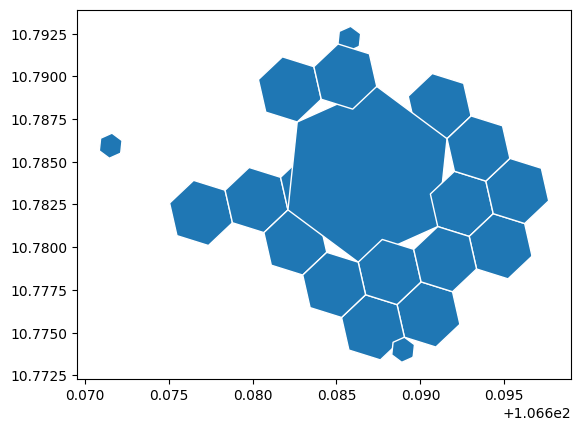

In [4]:
import geopandas as gpd

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 10
gdf_polyfill = gdf.h3.polyfill(resolution, compact = True, predicate = "largest_overlap", explode = True)
gdf_polyfill.head()
gdf_polyfill = gdf_polyfill.h3.h32geo("h3")
gdf_polyfill.plot(edgecolor = "white")

### H3 point binning

<Axes: >

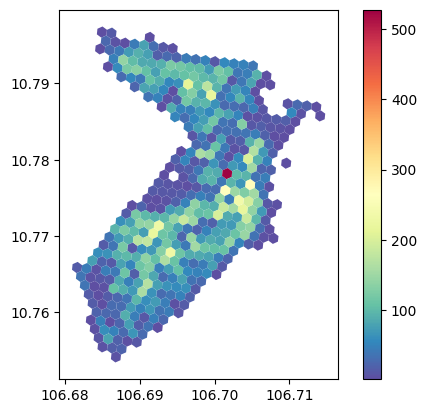

In [5]:
import pandas as pd
resolution = 10
df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
# df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
df.head()
stats = "count"
df_bin = df.h3.h3bin(resolution=resolution, stats = stats, 
                    # numeric_column="confidence",
                    # category_column="category",
                    return_geometry=True)
df_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)
